In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_rows', 15)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


In [2]:
# Load merged data
mergeddata = pd.read_csv('mergeddata.csv', index_col = 0)
mergeddata.head()

C:\Users\pmogh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,uid,id,owned,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,developer,sentiment,metascore
0,0,10,1.0,Valve,['Action'],Counter-Strike,Counter-Strike,http://store.steampowered.com/app/10/CounterSt...,2000-11-01,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",NaN,http://steamcommunity.com/app/10/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",9.99,False,Valve,Overwhelmingly Positive,88.0
1,1,10,1.0,Valve,['Action'],Counter-Strike,Counter-Strike,http://store.steampowered.com/app/10/CounterSt...,2000-11-01,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",NaN,http://steamcommunity.com/app/10/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",9.99,False,Valve,Overwhelmingly Positive,88.0
2,3,10,1.0,Valve,['Action'],Counter-Strike,Counter-Strike,http://store.steampowered.com/app/10/CounterSt...,2000-11-01,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",NaN,http://steamcommunity.com/app/10/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",9.99,False,Valve,Overwhelmingly Positive,88.0
3,4,10,1.0,Valve,['Action'],Counter-Strike,Counter-Strike,http://store.steampowered.com/app/10/CounterSt...,2000-11-01,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",NaN,http://steamcommunity.com/app/10/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",9.99,False,Valve,Overwhelmingly Positive,88.0
4,10,10,1.0,Valve,['Action'],Counter-Strike,Counter-Strike,http://store.steampowered.com/app/10/CounterSt...,2000-11-01,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",NaN,http://steamcommunity.com/app/10/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",9.99,False,Valve,Overwhelmingly Positive,88.0


In [3]:
mergeddata.shape

(819988, 18)

In [4]:
mergeddata.describe()

,uid,id,owned,discount_price,metascore
count,819988.000000,819988.000000,819988.0,1052.000000,485063.000000
mean,5090.851825,185177.375136,1.0,0.637405,78.504638
std,2858.808048,135141.482185,0.0,0.698054,9.801869
min,0.000000,10.000000,1.0,0.490000,20.000000
25%,2641.000000,34900.000000,1.0,0.490000,73.000000
50%,5121.000000,218820.000000,1.0,0.490000,80.000000
75%,7546.000000,287290.000000,1.0,0.490000,85.000000
max,9999.000000,530720.000000,1.0,7.490000,96.000000


In [5]:
mergeddata.describe(include="object")

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,developer,sentiment
count,806910,816219,819988,819988,819988,818866,819971,819988,816228,804282,812896,819639
unique,3747,569,8169,8169,8171,2621,7125,8171,1563,104,5228,18
top,Valve,['Action'],Counter-Strike: Global Offensive,Counter-Strike: Global Offensive,http://store.steampowered.com/app/730/CounterS...,2012-08-21,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...",http://steamcommunity.com/app/730/reviews/?bro...,['Single-player'],9.99,Valve,Very Positive
freq,58250,145396,6966,6966,6966,7086,6966,6966,68096,136063,49265,410388


# Find the count of Numeric column and Categorical Column

In [6]:
print(f"Find the count of Numeric Column : {len(mergeddata.select_dtypes(include=np.number).columns)}")

print(f"Numeric Column Name : {mergeddata.select_dtypes(include=np.number).columns.tolist}")

Find the count of Numeric Column : 5
Numeric Column Name : <bound method IndexOpsMixin.tolist of Index(['uid', 'id', 'owned', 'discount_price', 'metascore'], dtype='object')>


In [7]:
print(f"Find the count of Categorical Column : {len(mergeddata.select_dtypes(exclude=np.number).columns)}")

print(f"Categorical Column Name : {mergeddata.select_dtypes(exclude=np.number).columns.tolist}")

Find the count of Categorical Column : 13
Categorical Column Name : <bound method IndexOpsMixin.tolist of Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'early_access', 'developer',
       'sentiment'],
      dtype='object')>


In [8]:
mergeddata.isnull().sum().sort_values(ascending=False).head(15)

discount_price    818936
metascore         334925
price              15706
publisher          13078
developer           7092
genres              3769
specs               3760
release_date        1122
sentiment            349
tags                  17
id                     0
reviews_url            0
url                    0
title                  0
early_access           0
dtype: int64

# Find total null values in data and percentage of null values in each columns

In [9]:
def find_total_perc_missing (data_set):
    temp_missing_val = (data_set.isnull().sum()).sum()
    total_cel = np.product(data_set.shape)
    perc_missing_data=100 * (temp_missing_val/total_cel)
    return perc_missing_data

In [10]:
print(find_total_perc_missing(mergeddata))

8.121758421396953


In [11]:
def find_missing_value(data_set):
    percent_missing = data_set.isnull().sum() * 100 / len(data_set)
    missing_value_df = pd.DataFrame({'column_name': data_set.columns,'percent_missing': percent_missing})
    missing_value_df=missing_value_df.sort_values('percent_missing', ascending=False)
    
    return missing_value_df

In [12]:
find_missing_value(mergeddata).head(15)

,column_name,percent_missing
discount_price,discount_price,99.871705
metascore,metascore,40.845110
price,price,1.915394
publisher,publisher,1.594901
developer,developer,0.864891
genres,genres,0.459641
specs,specs,0.458543
release_date,release_date,0.136831
sentiment,sentiment,0.042562
tags,tags,0.002073


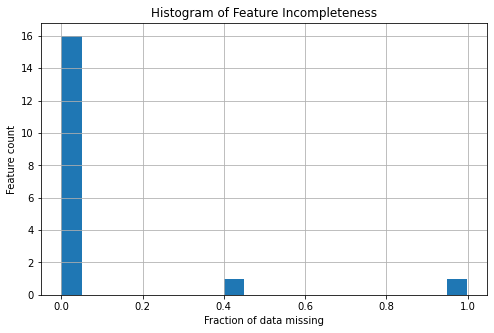

In [13]:
plt.figure(figsize=(8,5))
(mergeddata.isna().sum() / mergeddata.shape[0]).hist(bins=20)
plt.title('Histogram of Feature Incompleteness')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count');

In [14]:
def remove_columns (data_set,final_val_data):
    list_remove_column=[]
    for index,row in final_val_data.iterrows():
        if row['percent_missing'] > 60:
            if index in mergeddata.columns:
                list_remove_column.append(index)
    return list_remove_column

# Remove the column with more than 50% null values

In [15]:
# calling the above function to find the list of above 60
Removed_Column_Name=remove_columns(mergeddata,find_missing_value(mergeddata))
mergeddata=mergeddata.drop(Removed_Column_Name, axis=1)

In [16]:
find_missing_value(mergeddata).head(15)

,column_name,percent_missing
metascore,metascore,40.845110
price,price,1.915394
publisher,publisher,1.594901
developer,developer,0.864891
genres,genres,0.459641
specs,specs,0.458543
release_date,release_date,0.136831
sentiment,sentiment,0.042562
tags,tags,0.002073
url,url,0.000000


Now check the shape of the dataset

In [17]:
print('Merge Data',mergeddata.isnull().all(axis=0).sum())

Merge Data 0


In [18]:
print("Merge Data",len(mergeddata[mergeddata.isnull().sum(axis=1)>14].index))

Merge Data 0


In [19]:
type(mergeddata.release_date)

pandas.core.series.Series

Feature engineer the date into year and months

In [20]:
mergeddata['release_date'] = pd.to_datetime(pd.to_datetime(mergeddata['release_date'], errors='coerce', format='%Y-%m-%d'))

In [21]:
mergeddata['release_date_year']=mergeddata['release_date'].dt.year
mergeddata['release_date_month']=mergeddata['release_date'].dt.month

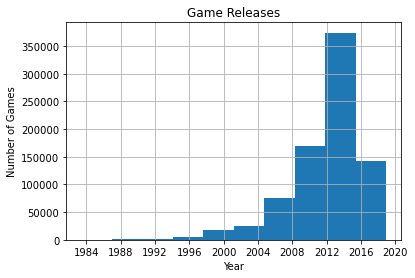

In [22]:
# Plot histogram of release date feat
mergeddata['release_date'].hist()
plt.title('Game Releases')
plt.ylabel('Number of Games')
plt.xlabel('Year')
plt.show()

In [23]:
mergeddata.shape

(819988, 19)

In [24]:
mergeddata.sentiment.value_counts()

Very Positive              410388
Overwhelmingly Positive    133583
Mixed                      124518
Mostly Positive            118654
Mostly Negative             13260
                            ...  
5 user reviews                682
3 user reviews                646
9 user reviews                608
Overwhelmingly Negative       539
1 user reviews                523
Name: sentiment, Length: 18, dtype: int64

In [25]:
mergeddata.sentiment.unique()

array(['Overwhelmingly Positive', 'Very Positive', 'Mostly Positive',
       'Mixed', 'Mostly Negative', 'Overwhelmingly Negative', 'Positive',
       '2 user reviews', '8 user reviews', '5 user reviews',
       '7 user reviews', '6 user reviews', 'Very Negative',
       '3 user reviews', 'Negative', '4 user reviews', '1 user reviews',
       '9 user reviews', nan], dtype=object)

In [26]:
mergeddata['sentiment']=mergeddata['sentiment'].replace(['Overwhelmingly Positive','Very Positive','Mostly Positive', 'Positive'],'Positive')
mergeddata['sentiment']=mergeddata['sentiment'].replace(['Overwhelmingly Negative','Very Negative','Mostly Negative', 'Negative'],'Negative')
mergeddata['sentiment']=mergeddata['sentiment'].replace(['1 user reviews','2 user reviews','3 user reviews', '4 user reviews','5 user reviews','6 user reviews','7 user reviews', '8 user reviews','9 user reviews'],'Mixed')

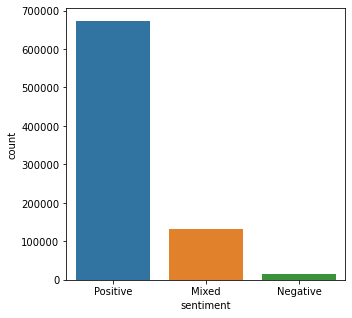

In [27]:
plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data=mergeddata)
plt.show()

Filling the Missing Data to remove null values.

In [28]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):
        # Find most common value with value_counts() which returns 
        # counts in descending order so that the first element is the most frequently-occurring element.
        self.fill = pd.Series([X[c].value_counts().index[0]
            #Use that if type is object otherwise use mean                   
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [29]:
find_missing_value(mergeddata)

,column_name,percent_missing
metascore,metascore,40.845110
price,price,1.915394
publisher,publisher,1.594901
developer,developer,0.864891
release_date_month,release_date_month,0.717937
...,...,...
url,url,0.000000
title,title,0.000000
app_name,app_name,0.000000
owned,owned,0.000000


In [30]:
mergeddata = DataFrameImputer().fit_transform(mergeddata)

In [31]:
find_missing_value(mergeddata)

,column_name,percent_missing
uid,uid,0.0
reviews_url,reviews_url,0.0
release_date_year,release_date_year,0.0
metascore,metascore,0.0
sentiment,sentiment,0.0
...,...,...
app_name,app_name,0.0
genres,genres,0.0
publisher,publisher,0.0
owned,owned,0.0


In [32]:
svd_data=mergeddata.copy(deep=True)

In [33]:
mergeddata.head()

,uid,id,owned,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,developer,sentiment,metascore,release_date_year,release_date_month
0,0,10,1.0,Valve,['Action'],Counter-Strike,Counter-Strike,http://store.steampowered.com/app/10/CounterSt...,2000-11-01,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",http://steamcommunity.com/app/10/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",9.99,False,Valve,Positive,88.0,2000.0,11.0
1,1,10,1.0,Valve,['Action'],Counter-Strike,Counter-Strike,http://store.steampowered.com/app/10/CounterSt...,2000-11-01,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",http://steamcommunity.com/app/10/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",9.99,False,Valve,Positive,88.0,2000.0,11.0
2,3,10,1.0,Valve,['Action'],Counter-Strike,Counter-Strike,http://store.steampowered.com/app/10/CounterSt...,2000-11-01,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",http://steamcommunity.com/app/10/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",9.99,False,Valve,Positive,88.0,2000.0,11.0
3,4,10,1.0,Valve,['Action'],Counter-Strike,Counter-Strike,http://store.steampowered.com/app/10/CounterSt...,2000-11-01,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",http://steamcommunity.com/app/10/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",9.99,False,Valve,Positive,88.0,2000.0,11.0
4,10,10,1.0,Valve,['Action'],Counter-Strike,Counter-Strike,http://store.steampowered.com/app/10/CounterSt...,2000-11-01,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",http://steamcommunity.com/app/10/reviews/?brow...,"['Multi-player', 'Valve Anti-Cheat enabled']",9.99,False,Valve,Positive,88.0,2000.0,11.0


In [34]:
print(mergeddata.select_dtypes(exclude=np.number).columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'early_access', 'developer',
       'sentiment'],
      dtype='object')>


In [35]:
import category_encoders as ce

def encode_category_data(dataset_var):
       #We establish the Ordinal encoder which will convert each categorical label to a number
       # We specify the columns we want to transform, we ask it to handle missing values if any and also to return a dataframe                     instead of an np array
       encode_var = ce.OrdinalEncoder(cols=['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'early_access', 'developer',
       'sentiment'],handle_missing='return_nan',return_df= True)
       dataset_var=encode_var.fit_transform(dataset_var)
       return dataset_var

In [36]:
#We now fit the model and transform the data and put it in X which is a dataframe
mergeddata=encode_category_data(mergeddata)

In [37]:
mergeddata.sentiment.value_counts()

1.0    673232
2.0    131330
3.0     15426
Name: sentiment, dtype: int64

In [38]:
mergeddata.head()

,uid,id,owned,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,developer,sentiment,metascore,release_date_year,release_date_month
0,0,10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,88.0,2000.0,11.0
1,1,10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,88.0,2000.0,11.0
2,3,10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,88.0,2000.0,11.0
3,4,10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,88.0,2000.0,11.0
4,10,10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,88.0,2000.0,11.0


Due to hardware Limitation,I am only taking 2Lakh Data for Model

In [39]:
temp = 200000
mergeddata=mergeddata[:temp]

In [40]:
mergeddata.sentiment.value_counts()

1.0    191818
2.0      5693
3.0      2489
Name: sentiment, dtype: int64

Choose the Y and x for the Split

In [41]:
X = mergeddata.iloc[:,mergeddata.columns!='sentiment']
y = mergeddata.iloc[:,mergeddata.columns=='sentiment']
print(y.shape)
print(X.shape)
del mergeddata

(200000, 1)
(200000, 18)


Apply the K-Fold to split the Test and Train Equally

In [42]:
from sklearn.model_selection import StratifiedKFold
variables = StratifiedKFold(n_splits=4)

for train,test in variables.split(X,y):
    x_train,x_test=X.iloc[train],X.iloc[test]
    y_train,y_test=y.iloc[train],y.iloc[test]

In [43]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import train_test_split,cross_validate
from surprise import Reader ,accuracy

In [44]:
def check_standalone_prediction(smote_flag,norm_flag,scale_flag,pca_flag,x_train,y_train,x_test,y_test,model_var,modelName):
    if smote_flag == True:
        sm=SMOTE(random_state=42)
        x_train, y_train = sm.fit_resample(x_train, y_train)
    if norm_flag == True:
        normalizer = Normalizer(norm='l2')
        x_train = normalizer.fit_transform(x_train)
        x_test = normalizer.fit_transform(x_test)
    if scale_flag == True:
        scaler = StandardScaler()
        x_train=scaler.fit_transform(x_train)
        x_test=scaler.transform(x_test)
    if pca_flag == True:
        pca=PCA(n_components=2)
        x_train = pca.fit_transform(x_train)
        x_test = pca.fit_transform(x_test)
    
    model_class = model_var.fit(x_train,y_train)
    y_hat=model_class.predict(x_test)       

    print(f"Accuracy Score {modelName}: {accuracy_score(y_test,y_hat)}")
    print(f"Confusion Matrix  {modelName}: {confusion_matrix(y_test,y_hat)}")
    print(f"Balanced Accuracy {modelName}: {balanced_accuracy_score(y_test,y_hat)}") 
    print(f"Classification_Report {modelName}: {classification_report(y_test,y_hat)}") 
        
    
    print(f"------------------------------------------------------") 
    plot_confusion_matrix(model_var,x_test,y_test)

Applying SVD Algorithm

In [45]:
df_svd= svd_data[['uid', 'id', 'sentiment']].copy()
del svd_data

In [46]:
encode=ce.OrdinalEncoder(cols=['sentiment'],handle_missing='return_nan',return_df= True)
df_svd=encode.fit_transform(df_svd)


In [47]:
df_svd.sentiment.value_counts()

1.0    673232
2.0    131330
3.0     15426
Name: sentiment, dtype: int64

In [48]:
reader=Reader(rating_scale=(1, 3))
data = Dataset.load_from_df(df_svd[['uid', 'id', 'sentiment']], reader)

In [49]:
svd_train,svd_test=train_test_split(data,test_size=.20)
model = SVD()
model.fit(svd_train)

In [50]:
pred_test=model.test(svd_test)
accuracy.rmse(pred_test)

RMSE: 0.0831


0.08312481239006464

In [51]:
pred=model.predict(15,10)
pred.est

1

In [52]:
cross_validate(model,data,cv=5,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.0838  0.0853  0.0852  0.0840  0.0849  0.0846  0.0006  
MAE (testset)     0.0354  0.0359  0.0360  0.0354  0.0358  0.0357  0.0002  
Fit time          28.24   28.60   28.46   28.47   28.47   28.45   0.12    
Test time         1.28    1.05    1.08    1.28    1.06    1.15    0.11    


{'test_rmse': array([0.08380559, 0.08527449, 0.08518199, 0.08401503, 0.08487453]),
 'test_mae': array([0.03542969, 0.03594819, 0.03599999, 0.03543335, 0.03583647]),
 'fit_time': (28.238356113433838,
  28.597787141799927,
  28.458404302597046,
  28.470713138580322,
  28.465381860733032),
 'test_time': (1.2832889556884766,
  1.0502362251281738,
  1.0782546997070312,
  1.2783007621765137,
  1.0552377700805664)}

Apply Other Models

Accuracy Score Decision Tree: 0.8725
Confusion Matrix  Decision Tree: [[42925  4389   640]
 [ 1223   200     0]
 [  123     0   500]]
Balanced Accuracy Decision Tree: 0.6127483403354425
Classification_Report Decision Tree:               precision    recall  f1-score   support

         1.0       0.97      0.90      0.93     47954
         2.0       0.04      0.14      0.07      1423
         3.0       0.44      0.80      0.57       623

    accuracy                           0.87     50000
   macro avg       0.48      0.61      0.52     50000
weighted avg       0.94      0.87      0.90     50000

------------------------------------------------------


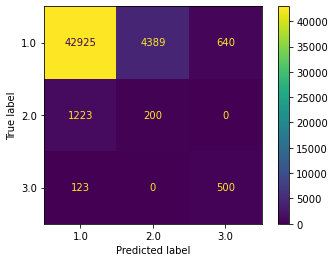

In [53]:
smote_flag=True
norm_flag=False
scale_flag=True
pca_flag=False
decision_tree=tree.DecisionTreeClassifier()
check_standalone_prediction(smote_flag,norm_flag,scale_flag,pca_flag,x_train.copy(deep=False),y_train.copy(deep=False),x_test.copy(deep=False),y_test.copy(deep=False),decision_tree,"Decision Tree")

<ipython-input-44-29664ce375fa>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_class = model_var.fit(x_train,y_train)


Accuracy Score Random Forest Tree: 0.98592
Confusion Matrix  Random Forest Tree: [[47954     0     0]
 [  581   842     0]
 [  123     0   500]]
Balanced Accuracy Random Forest Tree: 0.7980919593906873
Classification_Report Random Forest Tree:               precision    recall  f1-score   support

         1.0       0.99      1.00      0.99     47954
         2.0       1.00      0.59      0.74      1423
         3.0       1.00      0.80      0.89       623

    accuracy                           0.99     50000
   macro avg       1.00      0.80      0.88     50000
weighted avg       0.99      0.99      0.98     50000

------------------------------------------------------


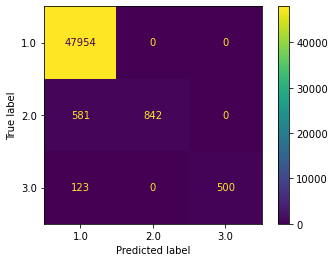

In [54]:
smote_flag=True
norm_flag=False
scale_flag=True
pca_flag=False
random_state_class=RandomForestClassifier()
check_standalone_prediction(smote_flag,norm_flag,scale_flag,pca_flag,x_train.copy(deep=False),y_train.copy(deep=False),x_test.copy(deep=False),y_test.copy(deep=False),random_state_class,"Random Forest Tree")

C:\Users\pmogh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score Knn Model: 0.91064
Confusion Matrix  Knn Model: [[45532  2422     0]
 [ 1423     0     0]
 [  123   500     0]]
Balanced Accuracy Knn Model: 0.3164977547927875
Classification_Report Knn Model:               precision    recall  f1-score   support

         1.0       0.97      0.95      0.96     47954
         2.0       0.00      0.00      0.00      1423
         3.0       0.00      0.00      0.00       623

    accuracy                           0.91     50000
   macro avg       0.32      0.32      0.32     50000
weighted avg       0.93      0.91      0.92     50000

------------------------------------------------------


C:\Users\pmogh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pmogh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pmogh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


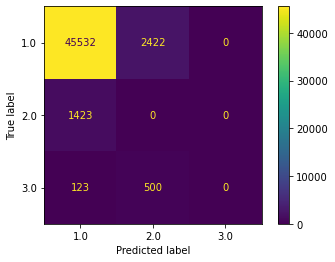

In [55]:
smote_flag=True
norm_flag=False
scale_flag=False
pca_flag=True
knnclassifer = KNeighborsClassifier(n_neighbors=2)
check_standalone_prediction(smote_flag,norm_flag,scale_flag,pca_flag,x_train.copy(deep=False),y_train.copy(deep=False),x_test.copy(deep=False),y_test.copy(deep=False),knnclassifer,"Knn Model")

C:\Users\pmogh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy Score SVM Model Tree: 0.98238
Confusion Matrix  SVM Model Tree: [[47954     0     0]
 [  758   665     0]
 [  123     0   500]]
Balanced Accuracy SVM Model Tree: 0.7566302587582209
Classification_Report SVM Model Tree:               precision    recall  f1-score   support

         1.0       0.98      1.00      0.99     47954
         2.0       1.00      0.47      0.64      1423
         3.0       1.00      0.80      0.89       623

    accuracy                           0.98     50000
   macro avg       0.99      0.76      0.84     50000
weighted avg       0.98      0.98      0.98     50000

------------------------------------------------------


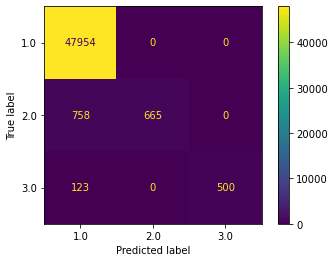

In [56]:
smote_flag=True
norm_flag=False
scale_flag=True
pca_flag=False
svm_class=svm.SVC()
check_standalone_prediction(smote_flag,norm_flag,scale_flag,pca_flag,x_train.copy(deep=False),y_train.copy(deep=False),x_test.copy(deep=False),y_test.copy(deep=False),svm_class,"SVM Model Tree")

In [45]:
def hyper_parameter(pipe,param,x_train,y_train,x_test,y_test,model_name):
    rsv=GridSearchCV(pipe,param,cv=10,n_jobs=-1)
    rsv.fit(x_train, y_train)
    score = rsv.score(x_test, y_test)
    y_hat=rsv.predict(x_test)
    print("Score:",score)
    print("Best Param",rsv.best_params_)
    print("Best estimator",rsv.best_estimator_)
    print(f"Accuracy Score {model_name}: {accuracy_score(y_test,y_hat)}")
    print(f"Confusion Matrix  {model_name}: {confusion_matrix(y_test,y_hat)}")
    print(f"Balanced Accuracy {model_name}: {balanced_accuracy_score(y_test,y_hat)}") 
    print(f"Classification_Report {model_name}: {classification_report(y_test,y_hat)}") 

    print(f"------------------------------------------------------") 
    plot_confusion_matrix(rsv,x_test,y_test)

In [46]:
def hyper_parameter_random(pipe,param,x_train,y_train,x_test,y_test,model_name):
    rsv=RandomizedSearchCV(pipe,param,cv=10,n_jobs=-1)
    rsv.fit(x_train, y_train)
    score = rsv.score(x_test, y_test)
    y_hat=rsv.predict(x_test)
    print("Score:",score)
    print("Best Param",rsv.best_params_)
    print("Best estimator",rsv.best_estimator_)
    print(f"Accuracy Score {model_name}: {accuracy_score(y_test,y_hat)}")
    print(f"Confusion Matrix  {model_name}: {confusion_matrix(y_test,y_hat)}")
    print(f"Balanced Accuracy {model_name}: {balanced_accuracy_score(y_test,y_hat)}") 
    print(f"Classification_Report {model_name}: {classification_report(y_test,y_hat)}") 

    print(f"------------------------------------------------------") 
    plot_confusion_matrix(rsv,x_test,y_test)

Score: 0.8794
Best Param {'clf__criterion': 'gini', 'clf__max_depth': 10}
Best estimator Pipeline(steps=[('transformer', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=10))])
Accuracy Score Decision Tree: 0.8794
Confusion Matrix  Decision Tree: [[43270  4560   124]
 [ 1223   200     0]
 [  123     0   500]]
Balanced Accuracy Decision Tree: 0.6151464718781708
Classification_Report Decision Tree:               precision    recall  f1-score   support

         1.0       0.97      0.90      0.93     47954
         2.0       0.04      0.14      0.06      1423
         3.0       0.80      0.80      0.80       623

    accuracy                           0.88     50000
   macro avg       0.60      0.62      0.60     50000
weighted avg       0.94      0.88      0.91     50000

------------------------------------------------------


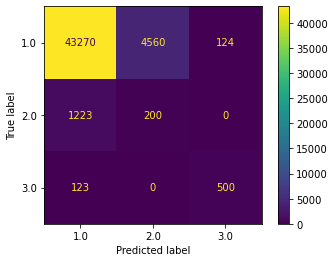

In [47]:
## Create Copy Of The Test Data
x_train_copy=x_train.copy(deep=False)
y_train_copy=y_train.copy(deep=False)
x_test_copy=x_test.copy(deep=False)
y_test_copy=y_test.copy(deep=False)
## Apply Smote On The Data
sm=SMOTE(random_state=42)
x_train_copy, y_train_copy = sm.fit_resample(x_train_copy, y_train_copy)
#x_test_copy, y_test_copy = sm.fit_resample(x_test_copy, y_test_copy)


params = {"clf__criterion": ['gini', 'entropy'],"clf__max_depth":[10,30,50,100,None]}

pipe = Pipeline(steps=[('transformer',StandardScaler()),("clf", tree.DecisionTreeClassifier())])
#pca 86
#without pca 99
hyper_parameter(pipe,params,x_train_copy,y_train_copy,x_test_copy,y_test_copy,"Decision Tree")
del x_train_copy
del y_train_copy
del x_test_copy
del y_test_copy

del params
del pipe

C:\Users\pmogh\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Score: 0.92158
Best Param {'clf__n_estimators': 10, 'clf__max_features': 10, 'clf__max_depth': 10, 'clf__criterion': 'entropy', 'clf__bootstrap': False}
Best estimator Pipeline(steps=[('transformer', StandardScaler()),
                ('clf',
                 RandomForestClassifier(bootstrap=False, criterion='entropy',
                                        max_depth=10, max_features=10,
                                        n_estimators=10))])
Accuracy Score Random Forest: 0.92158
Confusion Matrix  Random Forest: [[44737  3217     0]
 [  581   842     0]
 [  123     0   500]]
Balanced Accuracy Random Forest: 0.7757302516429846
Classification_Report Random Forest:               precision    recall  f1-score   support

         1.0       0.98      0.93      0.96     47954
         2.0       0.21      0.59      0.31      1423
         3.0       1.00      0.80      0.89       623

    accuracy                           0.92     50000
   macro avg       0.73      0.78      0.72     5000

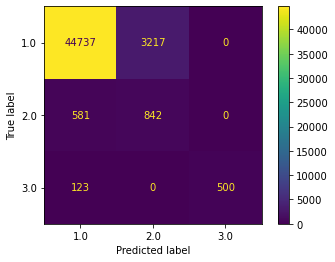

In [60]:
## Create Copy Of The Test Data
x_train_copy=x_train.copy(deep=False)
y_train_copy=y_train.copy(deep=False)
x_test_copy=x_test.copy(deep=False)
y_test_copy=y_test.copy(deep=False)
## Apply Smote On The Data
sm=SMOTE(random_state=42)
x_train_copy, y_train_copy = sm.fit_resample(x_train_copy, y_train_copy)
#x_test_copy, y_test_copy = sm.fit_resample(x_test_copy, y_test_copy)

params = {"clf__n_estimators": [10,30,50,100],"clf__max_depth": [10,50,None],"clf__max_features": [5, 10],"clf__bootstrap":[True,False],"clf__criterion":['gini','entropy']}
               
pipe = Pipeline(steps=[("transformer", StandardScaler()),("clf", RandomForestClassifier())])

hyper_parameter_random(pipe,params,x_train_copy,y_train_copy,x_test_copy,y_test_copy,"Random Forest")
del x_train_copy
del y_train_copy
del x_test_copy
del y_test_copy

del params
del pipe